In [47]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import os
from skimage import io, transform
import open3d as o3d
import h5py
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import open3d 

In [ ]:
598csv9/1484742/1495190

In [2]:
mainpath = r'C:\cherepashkin1\598test\plot_output\e054\041'.replace('\\','/')

In [3]:
exec(open(os.path.join('C:/circles/finetune_test/experiments/e057/cnet.py')).read())

In [4]:
hidden_dim = np.hstack((np.repeat(32, 1),1500))
chidden_dim = np.hstack((96,128,np.repeat(256, 3)))
kernel_sizes = np.hstack((7,np.repeat(3, 5)))

In [5]:
enim = 1
rescalef = 550
original_w = 1800
original_h = 1000

In [6]:
model = CNet(hidden_dim, chidden_dim, kernel_sizes,
            enim, rescalef,
            int(rescalef*original_w/original_h), True)
# model.load_state_dict(torch.load(os.path.join(mainpath,'model')))
# model.eval()

In [7]:
# original saved file with DataParallel
state_dict = torch.load(os.path.join(mainpath,'model'))
# create new OrderedDict that does not contain `module.`
from collections import OrderedDict
new_state_dict = OrderedDict()
for k, v in state_dict.items():
    name = k[7:] # remove `module.`
    new_state_dict[name] = v
# load params
model.load_state_dict(new_state_dict)
model.eval()

CNet(
  (conv0): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2))
  (conv1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(64, 96, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(96, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(128, 128, kernel_size=(4, 4), stride=(1, 1))
  (bn0): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): ModuleList(
    (0): Linear(in_features=211584, out_features=32, bias=True)
    (1): Linear(in_features=32, out_features=1500, bias=True)
  )
)

In [39]:
curimg = np.asarray(io.imread('C:/cherepashkin1/phenoseed/598/1484742/1495190/rotation_100.tif'), dtype=np.single)

In [98]:
curimg /= 255

In [216]:
curimg = 1 - curimg

In [221]:
curimg *= 255

In [223]:
curimg = 255 - curimg

In [224]:
curimg

array([[251., 251., 253., ..., 250., 246., 251.],
       [255., 253., 255., ..., 250., 254., 255.],
       [255., 255., 255., ..., 251., 255., 248.],
       ...,
       [232., 238., 235., ..., 233., 236., 235.],
       [227., 235., 227., ..., 231., 231., 239.],
       [236., 226., 231., ..., 233., 233., 232.]], dtype=float32)

In [225]:
curimg2 = transform.resize(curimg,(550, 990))
inputs = torch.unsqueeze(torch.unsqueeze(torch.Tensor(curimg2), axis=0), axis=0)

In [214]:
outputs, latent = model(inputs)

In [219]:
outputs2, latent2 = model(inputs)

In [226]:
outputs3, latent3 = model(inputs)

In [215]:
latent

tensor([[ 0.0729, -0.0293, -0.0286,  0.0218,  0.0513,  0.0243,  0.0416,  0.0926,
          0.0605,  0.0117,  0.0473,  0.0436,  0.0212,  0.0146,  0.0419, -0.0700,
          0.0711,  0.0815,  0.0042, -0.0389,  0.0476,  0.0423,  0.0812,  0.0534,
         -0.0236, -0.0117,  0.0572, -0.0315, -0.0550,  0.0495, -0.0464,  0.0053]],
       grad_fn=<AddmmBackward0>)

In [220]:
latent2

tensor([[ 0.5687, -0.9010, -0.0684,  1.2606,  0.8643,  0.1708, -0.9362, -0.6165,
         -0.7572,  0.0451, -0.6847, -0.5847, -0.7284,  0.7999,  0.8710,  0.2531,
         -0.7736, -0.0422, -0.4891, -0.0951, -0.5047, -0.3108,  0.4816, -0.2543,
          0.2539,  0.2879,  0.1584, -1.0798,  0.0790,  0.9114,  0.1817,  0.2067]],
       grad_fn=<AddmmBackward0>)

In [227]:
latent3

tensor([[ 0.0192,  0.0408, -0.0347, -0.0113,  0.0215, -0.0337, -0.0113,  0.0106,
          0.0078, -0.0008,  0.0210,  0.0349, -0.0401,  0.0253,  0.0094, -0.0090,
          0.0134, -0.0185, -0.0410, -0.0113,  0.0413,  0.0279, -0.0107, -0.0526,
          0.0240, -0.0549,  0.0183,  0.0087, -0.0583,  0.0235, -0.0252, -0.0186]],
       grad_fn=<AddmmBackward0>)

In [134]:
a = np.zeros([3,500])

In [136]:
from numpy import linalg as LA

In [138]:
LA.norm(a,axis=0).shape

(500,)

In [97]:
rimg = torch.rand(550,990)

In [118]:
outputs, latent = model(inputs)

In [119]:
p = np.reshape(np.squeeze(outputs.detach().numpy()), (3,500))

In [105]:
p.shape

(3, 500)

In [126]:
p *= 100*0.05

In [51]:
pcd = np.asarray(open3d.io.read_point_cloud('C:/cherepashkin1/phenoseed/598/1484742/1495190_Surface.ply').points)

In [52]:
prmat = np.genfromtxt('C:/circles/finetune_test/csv/prmat.csv', delimiter=',')
C = np.zeros([36,3,3])
E = [[1, 0, 0, 0],
 [0, 1, 0, 0],
 [0, 0, 1, 0]]
for i in range(36):
    C[i,:,:] =\
    np.matmul(np.matmul(E,prmat[4*i:4*(i+1),:]),
        np.linalg.pinv(np.matmul(E,prmat[0:4,:])))

In [108]:
p.shape

(3, 500)

In [127]:
p4 = np.matmul(p.transpose(),C[10])

In [109]:
pcd.shape

(25695, 3)

In [54]:
p1 = np.matmul(pcd,C[10])

In [58]:
p1*=0.05

In [60]:
p1 = p1.transpose()

In [62]:
p1.shape

(3, 25695)

In [67]:
np.mean(p1,axis=1).shape

(3,)

In [68]:
p1.shape

(3, 25695)

In [90]:
p2 = p1.transpose() - np.mean(p1,axis=1)

In [91]:
p2 = p2.transpose()

In [92]:
p2.shape

(3, 25695)

In [93]:
p2 = p2[:,::25]

In [262]:
p2.shape

(3, 1028)

In [129]:
p4 = p4.transpose()

In [253]:
def showpoints(p0,p1=None,p2=None,p3=None):
    vox2mm = 0.05
    fig = plt.figure(figsize=(15,6))
    ax = fig.add_subplot(1, 1, 0+1, projection='3d')
    # p0 = np.reshape(ot0,(3,500))
    # p1 = np.reshape(gt0,(3,500))
    #p3 - blue - model output from output folder
    #p2 - red - original pcd
    #p - green - model output from loaded model
    
    ax.scatter(p0[0,:],p0[1,:],p0[2,:], marker='o', s=10, c="g", alpha=0.6)
    if p1 is not None:    
        ax.scatter(p1[0,:],p1[1,:],p1[2,:], marker='o', s=10, c="b", alpha=0.6)
    if p2 is not None:    
        ax.scatter(p2[0,:],p2[1,:],p2[2,:], marker='o', s=10, c="r", alpha=0.6)
    # ax.scatter(p3[0,:],p3[1,:],p3[2,:], marker='o', s=10, c="b", alpha=0.6)
    # ax.scatter(p2[0,:],p2[1,:],p2[2,:], marker='o', s=10, c="r", alpha=0.6)
    # ax.scatter(p[0,:],p[1,:],p[2,:], marker='o', s=10, c="g", alpha=0.6)
    ax.view_init(elev=35, azim=25)
    ax_lim = 60*vox2mm
    ax.set_xlim(-ax_lim, ax_lim)
    ax.set_ylim(-ax_lim, ax_lim)
    ax.set_zlim(-ax_lim, ax_lim)
    plt.show()

In [233]:
outputs.shape

torch.Size([1, 1500])

In [244]:
p0 = outputs.detach().numpy().reshape(3,500).transpose()*0.05

In [245]:
p0.shape

(500, 3)

In [258]:
p1.shape

(3, 25695)

[-1.45371707e-12 -4.54585305e-13  2.03384735e-13]


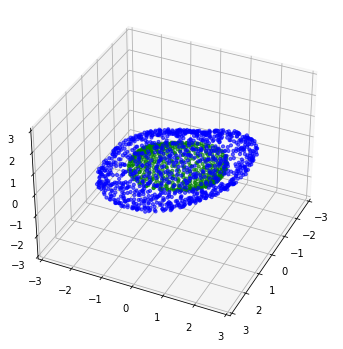

In [314]:
pcd = np.asarray(open3d.io.read_point_cloud('C:/cherepashkin1/phenoseed/598/1484742/'\
    '1495190_Surface.ply').points)
# pcd = (pcd.transpose() - np.mean(pcd,axis=1)).transpose()
pcd = np.matmul(pcd,C[10])
# print(np.mean(pcd,axis=1).shape)
pcd = pcd- np.mean(pcd,axis=0)

print(np.mean(pcd,axis=0))
# print(np.mean(pcd,axis=1).shape)
pcd*=0.05
pcd = pcd.transpose()
pcd=pcd[:,::25]
showpoints(outputs.detach().numpy().reshape(3,500)*5,pcd)
# pcd = pcd.transpose()

In [295]:
pcd.shape

(3, 1028)

In [296]:
pcd

array([[-0.65427518, -0.74213076, -0.67358278, ..., -3.52029223,
        -3.44306184, -3.53091742],
       [-2.6       , -2.71666666, -2.63333333, ..., -3.06666667,
        -2.93333333, -3.05      ],
       [ 2.27088614,  2.28924239,  2.28440547, ..., -1.24690221,
        -1.30097952, -1.28262327]])

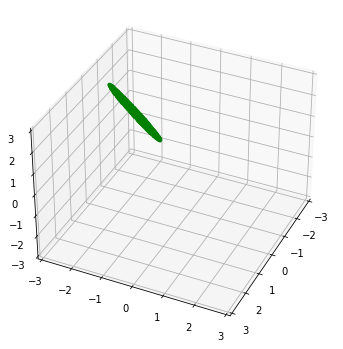

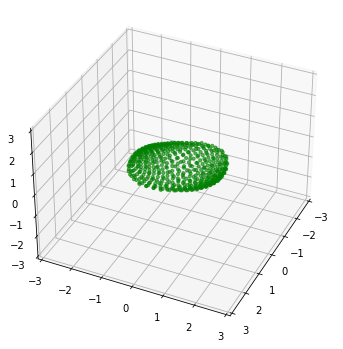

In [268]:
showpoints(outputs.detach().numpy().reshape(3,500)*5, pcd)

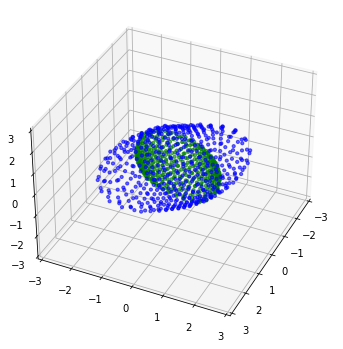

In [131]:
vox2mm = 0.05
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(1, 1, 0+1, projection='3d')
# p0 = np.reshape(ot0,(3,500))
# p1 = np.reshape(gt0,(3,500))
#p3 - blue - model output from output folder
#p2 - red - original pcd
#p - green - model output from loaded model
ax.scatter(p4[0,:],p4[1,:],p4[2,:], marker='o', s=10, c="g", alpha=0.6)
# ax.scatter(p3[0,:],p3[1,:],p3[2,:], marker='o', s=10, c="b", alpha=0.6)
# ax.scatter(p2[0,:],p2[1,:],p2[2,:], marker='o', s=10, c="r", alpha=0.6)
# ax.scatter(p[0,:],p[1,:],p[2,:], marker='o', s=10, c="g", alpha=0.6)
ax.view_init(elev=35, azim=25)
ax_lim = 60*vox2mm
ax.set_xlim(-ax_lim, ax_lim)
ax.set_ylim(-ax_lim, ax_lim)
ax.set_zlim(-ax_lim, ax_lim)
plt.show()

In [132]:
latent

tensor([[ 0.0729, -0.0293, -0.0286,  0.0218,  0.0513,  0.0243,  0.0416,  0.0926,
          0.0605,  0.0117,  0.0473,  0.0436,  0.0212,  0.0146,  0.0419, -0.0700,
          0.0711,  0.0815,  0.0042, -0.0389,  0.0476,  0.0423,  0.0812,  0.0534,
         -0.0236, -0.0117,  0.0572, -0.0315, -0.0550,  0.0495, -0.0464,  0.0053]],
       grad_fn=<AddmmBackward0>)

In [31]:
latent.shape

torch.Size([1, 32])

In [84]:
ot = np.genfromtxt('C:/cherepashkin1/598test/plot_output/e054/041/o_train_085', delimiter = ',')

In [86]:
ov = np.genfromtxt('C:/cherepashkin1/598test/plot_output/e054/041/o_val_085', delimiter = ',')

In [85]:
ot.shape

(1500,)

In [87]:
ov.shape

(4, 1500)

In [89]:
p3 = ot.reshape(3,500)

In [139]:
p3.shape

(3, 500)

In [142]:
p4.shape

(3, 500)

In [143]:

def showpoints(ax, el, az, p0, p1 = None):
    ax.scatter(p0[0,:],p0[1,:],p0[2,:], marker='o', s=10, c="r", alpha=0.6)
    if p1 is not None:
        ax.scatter(p1[0,:],p1[1,:],p1[2,:], marker='o', s=10, c="g", alpha=0.6)
    ax.view_init(elev=el, azim=az)
    ax_lim = 60*vox2mm
    ax.set_xlim(-ax_lim, ax_lim)
    ax.set_ylim(-ax_lim, ax_lim)
    ax.set_zlim(-ax_lim, ax_lim)

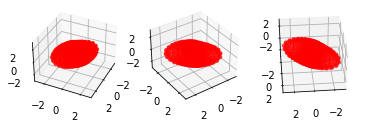

In [160]:
fig = plt.figure(figsize=(6,6))
el = np.repeat(35,3)
# az = np.arange(25,150,30)
az = np.arange(25,115,30)
# for j in range(3):
for i in range(el.shape[0]):
    ax = fig.add_subplot(3, el.shape[0], i+1,
        projection='3d')
    showpoints(ax, el[i], az[i], p3, p4)
#         for a in ax:
#         ax.set_xticklabels([])
#         ax.set_yticklabels([])
#         ax.set_zticklabels([])

# plt.subplots_adjust(wspace=0, hspace=0)

In [178]:
az

array([25, 55, 85])